# PARTE A: stima della massa

del coefficiente angolare della retta ottenuta nel piano a-F

E' attesa la relazione
$F = ma$

m carrello ROSSO:  (253.0 ± 0.5)e-3 Kg
Confidenza con valore atteso:  98.4 %
m carrello BLU:  (247.4 ± 1.1)e-3 Kg
Confidenza con valore atteso:  44.7 %


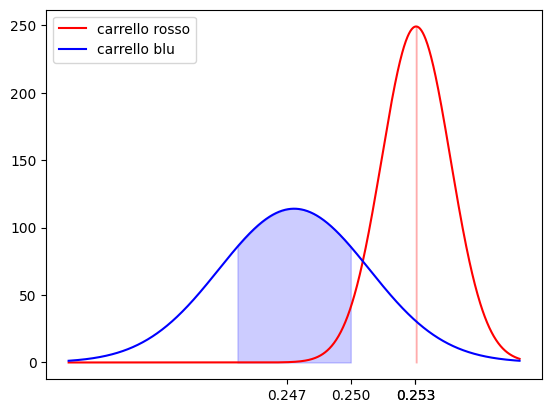

In [4]:
import numpy as np
import pandas as pd
import os
import scipy.stats as sc
import matplotlib.pyplot as plt
from interpolazione3 import final_val, probability_under_norm

PATH = os.path.abspath('')
FILE = PATH + '/../CSV/Fma_parteA.csv'
fr = pd.read_csv(FILE)

m154 = np.array(fr['m ROSSO'])
sigmam154 = np.array(fr['sigmam ROSSO']) # sottostimati da capstone ma usati per media pesata
wR = 1 / sigmam154**2
mB = np.array(fr['m BLU'])
sigmamB = np.array(fr['sigmam BLU'])
wB = 1 / sigmamB**2
N = len(m154)

# plt.hist(m154,bins=11, density=True)
# plt.hist(mB,bins=11, density=True)

sigmam154 = np.std(m154)
sigmamB = np.std(mB)
sigma_mediaR = sigmam154/np.sqrt(N)
sigma_mediaB = sigmamB/np.sqrt(N)
m154 = np.average(m154, weights=wR)
mB = np.average(mB, weights=wB)

x = np.linspace(min(m154-3*sigmam154,mB-3*sigmamB),max(m154+3*sigmam154,mB+3*sigmamB),1000)
R = sc.norm.pdf(x,loc=m154,scale=sigmam154)
plt.plot(x,R, color='red', label='carrello rosso')
t = np.abs(m154 - 0.253) / sigmam154

plt.fill_between(
    x= x,y1= R,where= (m154 - t*sigmam154 < x)&(x < m154 + t*sigmam154),
    color= "red",alpha= 0.2)

B = sc.norm.pdf(x,loc=mB,scale=sigmamB)
plt.plot(x,B, color='blue',label='carrello blu')
t = np.abs(mB - 0.250) / sigmamB

plt.fill_between(
    x= x,y1= B,where= (mB - t*sigmamB < x)&(x < mB + t*sigmamB),
    color= "blue",alpha= 0.2)

plt.xticks(np.round([mB,m154,0.250,0.253],3))


print('m carrello ROSSO: ',final_val(m154,sigma_mediaR,decimals=1,exp=-3,udm='Kg'))
print('Confidenza con valore atteso: ',100 - probability_under_norm(m154,sigmam154,0.253)*100,'%')

print('m carrello BLU: ',final_val(mB,sigma_mediaB,decimals=1,exp=-3,udm='Kg'))
print('Confidenza con valore atteso: ',np.round(100 - probability_under_norm(mB,sigmamB,0.250)*100,1),'%')


plt.legend()
plt.show()

i valori di massa ottenuti risultano essere molto vicini al valore atteso, in particolare abbiamo una confidenza del 98% per il carrello rosso e del 45% per il carrello blu. Entrambi risultano essere molto maggiori del 5%, è quindi confermata l'ipotesi $F = ma$ 

### aggiunta pesi

ai carrelli vengono aggiunte delle masse